In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ruta_input = "../data/"
df_Estudiante = pd.read_csv(ruta_input + "Estudiante.csv", sep=",")
df_Ciudad = pd.read_csv(ruta_input + "Ciudad.csv", sep=",")

In [17]:
plt.style.use("seaborn-v0_8-darkgrid")

In [18]:
# Columnas de los dataframes
print("Columnas df_Estudiante:", df_Estudiante.columns.tolist())
print("Columnas df_Ciudad:", df_Ciudad.columns.tolist())

Columnas df_Estudiante: ['ID', 'NOMBREAPELLIDO', 'CODIGOCIUDAD', 'FECHAINGRESO', 'TELEFONO', 'CORREO', 'CARRERA', 'NOMBRECIUDAD', 'CONTACTO_INCOMPLETO']
Columnas df_Ciudad: ['CODIGOCIUDAD', 'NOMBRECIUDAD', 'ESTUDIANTES']


In [19]:
# Primera Pregunta
# Número de estudiantes por ciudad, organizado de mayor a menor
print(df_Ciudad.sort_values(by='ESTUDIANTES', ascending=False)[['NOMBRECIUDAD', 'ESTUDIANTES']])

     NOMBRECIUDAD  ESTUDIANTES
0    Barranquilla          188
1          Bogotá          148
2        Medellín          138
3   Villavicencio           69
4     Santa Marta           68
5       Manizales           67
6           Pasto           67
7       Cartagena           65
8         Rioacha           65
9         Popayán           64
10        Pereira           61
11           Cali            0
12          Neiva            0
13        Armenia            0
14     Valledupar            0


Acá está la pregunta 1 y 4

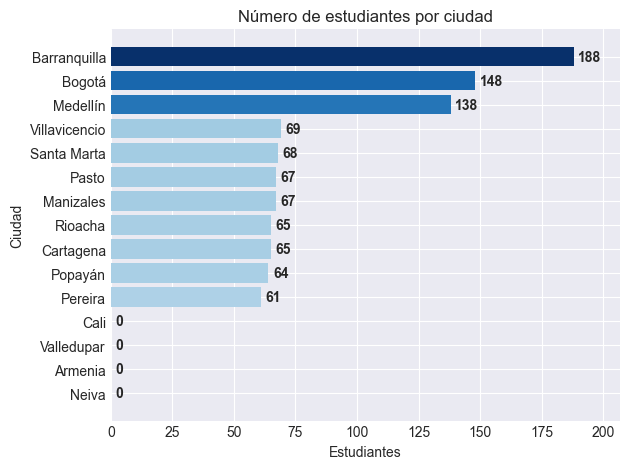

In [ ]:


df_ordenado = df_Ciudad.sort_values(by='ESTUDIANTES')


valores = df_ordenado['ESTUDIANTES']
norm = plt.Normalize(valores.min(), valores.max())
colores = plt.cm.Blues(norm(valores))  

plt.barh(df_ordenado['NOMBRECIUDAD'], valores, color=colores)

plt.xlabel('Estudiantes')
plt.ylabel('Ciudad')
plt.title('Número de estudiantes por ciudad')


for i, valor in enumerate(valores):
    plt.text(valor + (valores.max() * 0.01),
             i, 
             str(valor), 
             va='center', 
             ha='left', 
             fontweight='bold')

plt.margins(x=0.1, y=0.05) 
plt.tight_layout()

plt.show()

In [ ]:
# Cuarta Pregunta
print(df_Ciudad[df_Ciudad['ESTUDIANTES'] == 0]['NOMBRECIUDAD'])

11          Cali
12         Neiva
13       Armenia
14    Valledupar
Name: NOMBRECIUDAD, dtype: object


In [ ]:
# fecha de tipo "object" a tipo datetime y extraer el año
df_Estudiante['AÑO_INGRESO'] = pd.to_datetime(df_Estudiante['FECHAINGRESO']).dt.year

# 2. Agrupar por año de ingreso y carrera, y contar los estudiantes.
estudiantes_por_año_carrera = df_Estudiante.groupby(['AÑO_INGRESO', 'CARRERA']).size().reset_index(name='CANTIDAD_ESTUDIANTES')

# 3. Imprimir el resultado
print(estudiantes_por_año_carrera)

    AÑO_INGRESO                     CARRERA  CANTIDAD_ESTUDIANTES
0        2016.0  Administración de empresas                     6
1        2016.0            Ciencia política                    10
2        2016.0                 Estadística                     9
3        2016.0                   Geología                     12
4        2016.0      Ingenieria electrónica                     8
..          ...                         ...                   ...
75       2023.0          Ingenieria química                     8
76       2023.0       Ingeniería Industrial                     6
77       2023.0      Ingeniería de sistemas                    12
78       2023.0        Ingeniería eléctrica                     7
79       2023.0                 Matemáticas                     9

[80 rows x 3 columns]


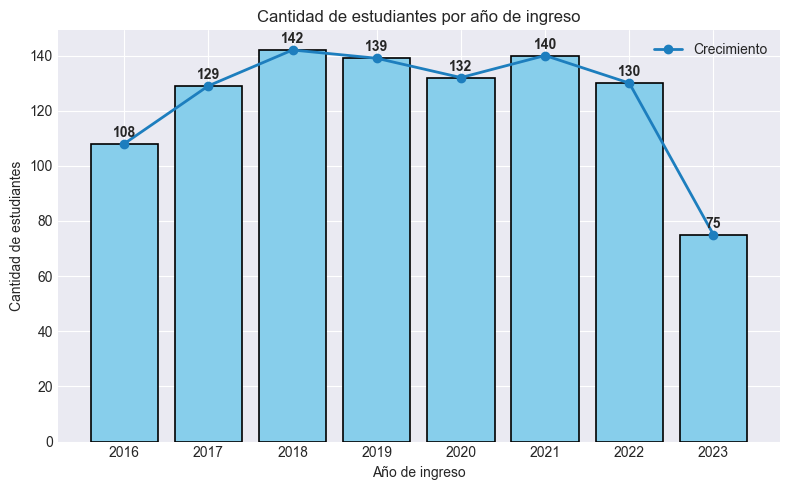

In [ ]:

estudiantes_por_año = estudiantes_por_año_carrera.groupby('AÑO_INGRESO')['CANTIDAD_ESTUDIANTES'].sum().reset_index()


años = estudiantes_por_año['AÑO_INGRESO'].astype(int)
valores = estudiantes_por_año['CANTIDAD_ESTUDIANTES']


plt.figure(figsize=(8, 5))


plt.bar(años, valores, color="skyblue", edgecolor='black', linewidth=1.2)

plt.plot(años, valores, color='#1D7EBE', marker='o', linewidth=2, label='Crecimiento')


plt.xlabel('Año de ingreso')
plt.ylabel('Cantidad de estudiantes')
plt.title('Cantidad de estudiantes por año de ingreso')


for x, valor in zip(años, valores):
    plt.text(x, valor + (valores.max() * 0.01), str(valor), 
             ha='center', va='bottom', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

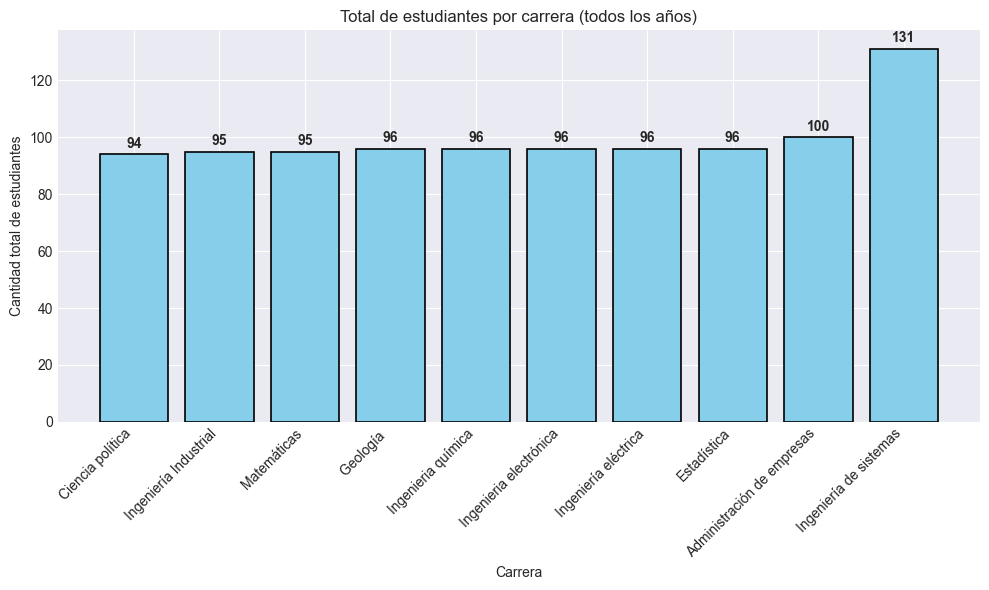

In [66]:
totales_carrera = estudiantes_por_año_carrera.groupby('CARRERA')['CANTIDAD_ESTUDIANTES'].sum().reset_index()

# Ordenar de menor a mayor
totales_carrera = totales_carrera.sort_values(by='CANTIDAD_ESTUDIANTES', ascending=True)

# Crear gráfica vertical sin heatmap
plt.figure(figsize=(10, 6))
plt.bar(
    totales_carrera['CARRERA'],
    totales_carrera['CANTIDAD_ESTUDIANTES'],
    color='skyblue',
    edgecolor='black',
    linewidth=1.2
)

# Etiquetas y título
plt.ylabel("Cantidad total de estudiantes")
plt.xlabel("Carrera")
plt.title("Total de estudiantes por carrera (todos los años)")

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Agregar valores encima de cada barra
for i, valor in enumerate(totales_carrera['CANTIDAD_ESTUDIANTES']):
    plt.text(i, valor + (valores.max() * 0.01), str(valor),
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Acá la idea es un dashboard donde puedas consultar por carrera :v

C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\1497563965.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\1497563965.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\1497563965.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\1497563965.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.l

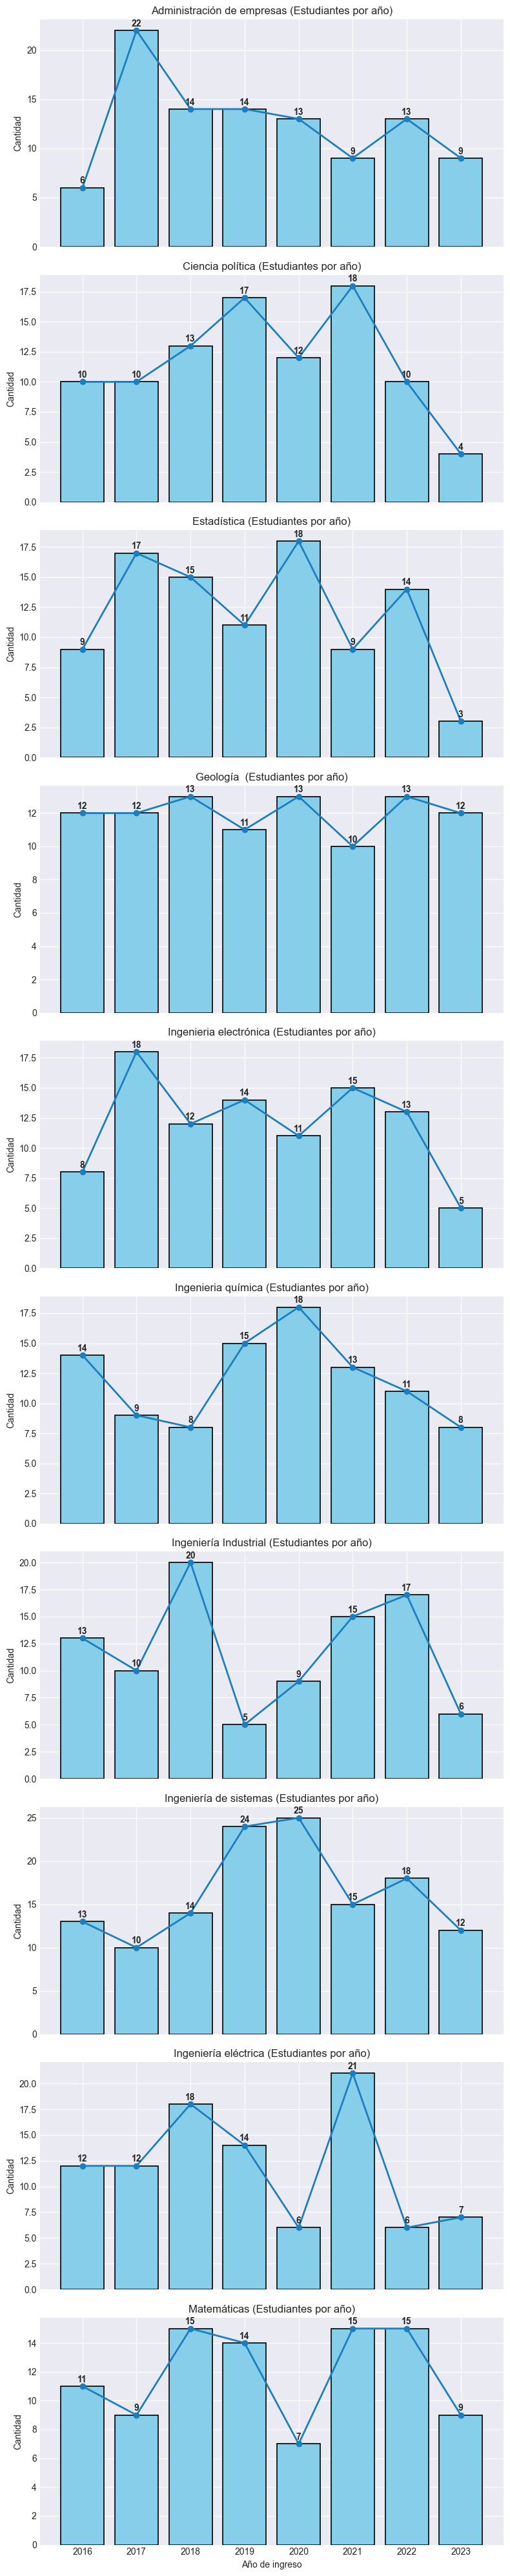

In [ ]:


carreras = sorted(estudiantes_por_año_carrera['CARRERA'].unique())

fig, axes = plt.subplots(len(carreras), 1, figsize=(8, 4 * len(carreras)), sharex=True)

if len(carreras) == 1:
    axes = [axes]

for ax, carrera in zip(axes, carreras):

    datos_carrera = estudiantes_por_año_carrera[estudiantes_por_año_carrera['CARRERA'] == carrera] \
                        .sort_values(by='AÑO_INGRESO')
    
    años = datos_carrera['AÑO_INGRESO'].astype(int)
    valores = datos_carrera['CANTIDAD_ESTUDIANTES']
    

    ax.bar(años, valores, color='skyblue', edgecolor='black', linewidth=1.2)

    ax.plot(años, valores, color="#1D7EBE", marker='o', linewidth=2)
    
    ax.set_title(f"{carrera} (Estudiantes por año)")
    ax.set_ylabel("Cantidad")
    

    for x, valor in zip(años, valores):
        ax.text(x, valor + (valores.max() * 0.01), str(valor),
                ha='center', va='bottom', fontweight='bold')
    
    ax.legend()

plt.xlabel("Año de ingreso")
plt.tight_layout()
plt.show()

acá tmb dashboard en streamlit

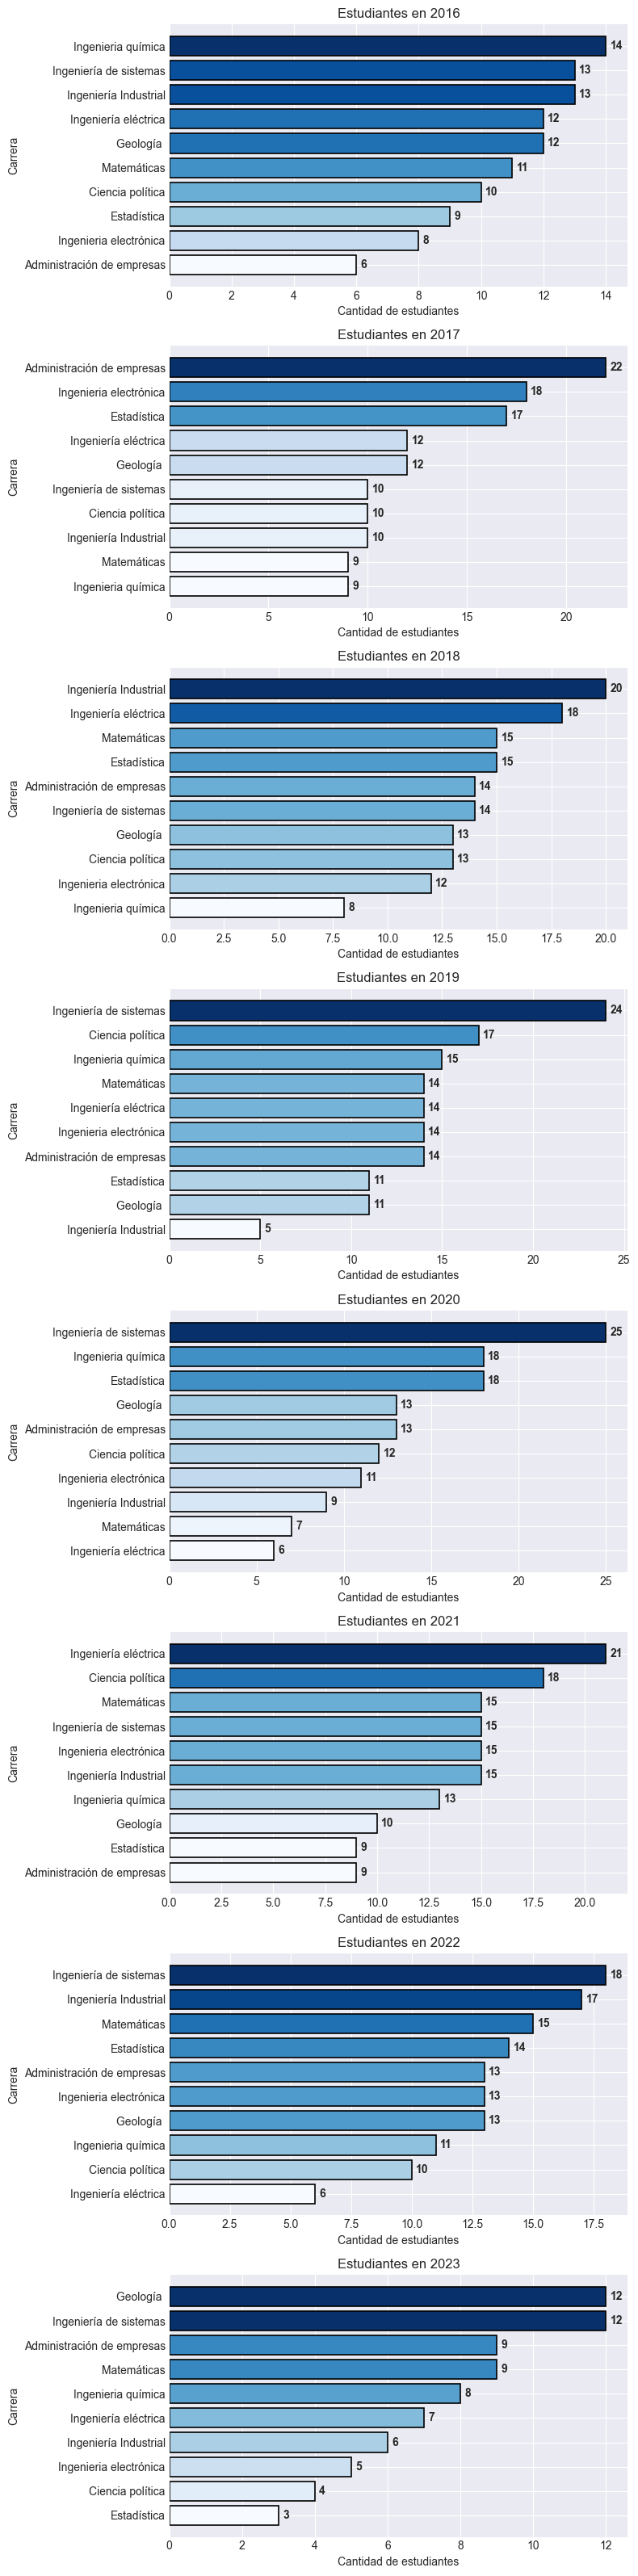

In [ ]:

años = sorted(estudiantes_por_año_carrera['AÑO_INGRESO'].unique())

# Crear subplots
fig, axes = plt.subplots(len(años), 1, figsize=(8, 4 * len(años)), sharex=False)


if len(años) == 1:
    axes = [axes]

for ax, año in zip(axes, años):

    datos_año = estudiantes_por_año_carrera[estudiantes_por_año_carrera['AÑO_INGRESO'] == año] \
                    .sort_values(by='CANTIDAD_ESTUDIANTES', ascending=True)
    
    valores = datos_año['CANTIDAD_ESTUDIANTES']
    norm = plt.Normalize(valores.min(), valores.max())
    colores = plt.cm.Blues(norm(valores))  

    ax.barh(datos_año['CARRERA'], valores, color=colores, edgecolor='black', linewidth=1.2)

    ax.set_title(f"Estudiantes en {int(año)}")  
    ax.set_xlabel("Cantidad de estudiantes")
    ax.set_ylabel("Carrera")
    

    for i, valor in enumerate(valores):
        ax.text(valor + (valores.max() * 0.01), i, str(valor),
                va='center', ha='left', fontweight='bold')

plt.tight_layout()
plt.show()


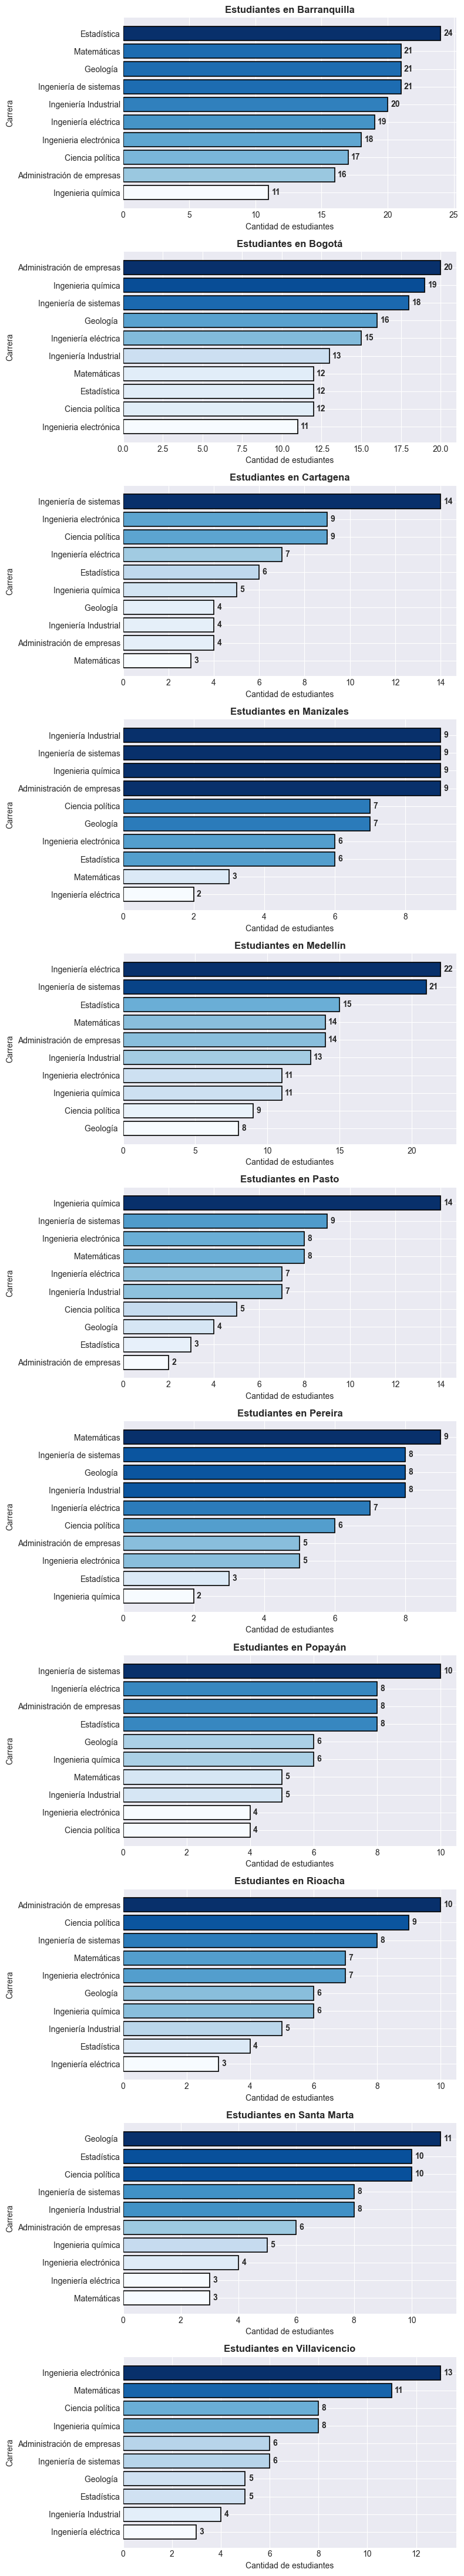

In [ ]:
estudiantes_por_ciudad_carrera = df_Estudiante.groupby(['NOMBRECIUDAD', 'CARRERA']).size().reset_index(name='CANTIDAD_ESTUDIANTES')


ciudades = sorted(estudiantes_por_ciudad_carrera['NOMBRECIUDAD'].unique())


fig, axes = plt.subplots(len(ciudades), 1, figsize=(8, 4 * len(ciudades)), sharex=False)

if len(ciudades) == 1:
    axes = [axes]

for ax, ciudad in zip(axes, ciudades):

    datos_ciudad = estudiantes_por_ciudad_carrera[estudiantes_por_ciudad_carrera['NOMBRECIUDAD'] == ciudad] \
                        .sort_values(by='CANTIDAD_ESTUDIANTES', ascending=True)
    
    valores = datos_ciudad['CANTIDAD_ESTUDIANTES']
    carreras = datos_ciudad['CARRERA']
    

    norm = plt.Normalize(valores.min(), valores.max())
    colores = plt.cm.Blues(norm(valores))

    ax.barh(carreras, valores, color=colores, edgecolor='black', linewidth=1.2)
    

    ax.set_title(f"Estudiantes en {ciudad}", fontweight='bold')
    ax.set_xlabel("Cantidad de estudiantes")
    ax.set_ylabel("Carrera")
    

    for i, valor in enumerate(valores):
        ax.text(valor + (valores.max() * 0.01), i, str(valor),
                va='center', ha='left', fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\3095907730.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


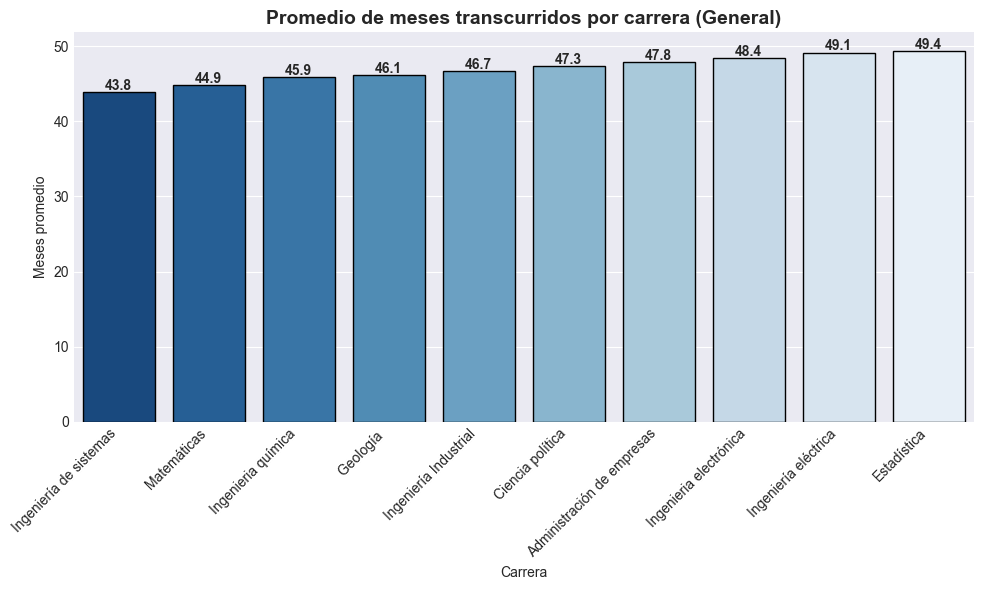

C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\3095907730.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


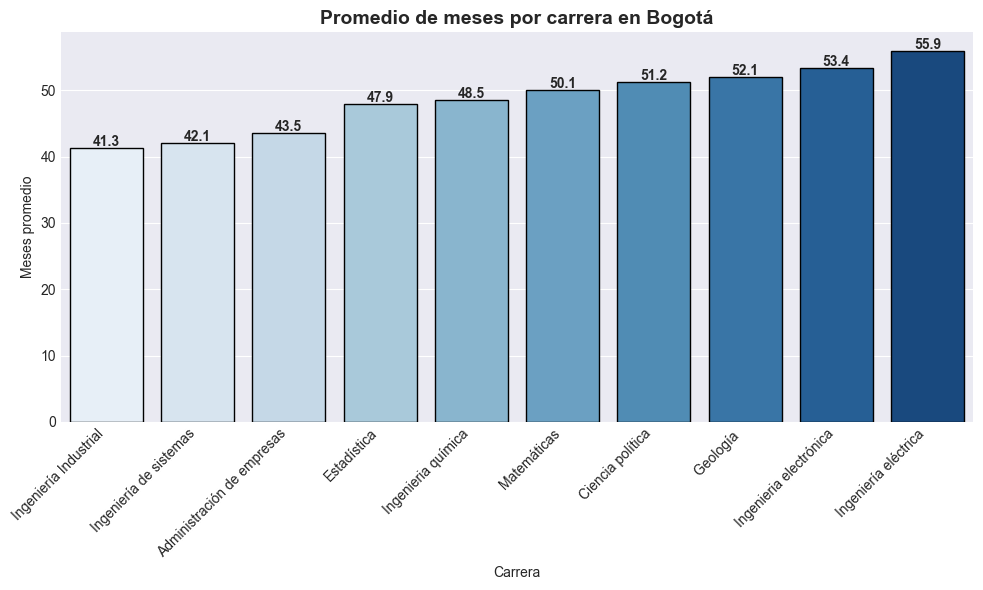

C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\3095907730.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


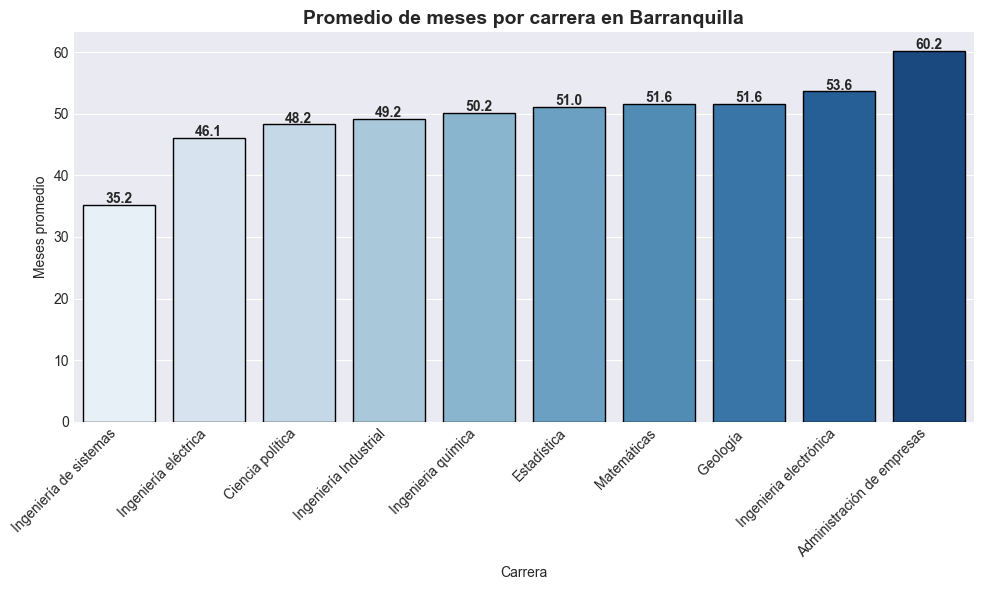

C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\3095907730.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


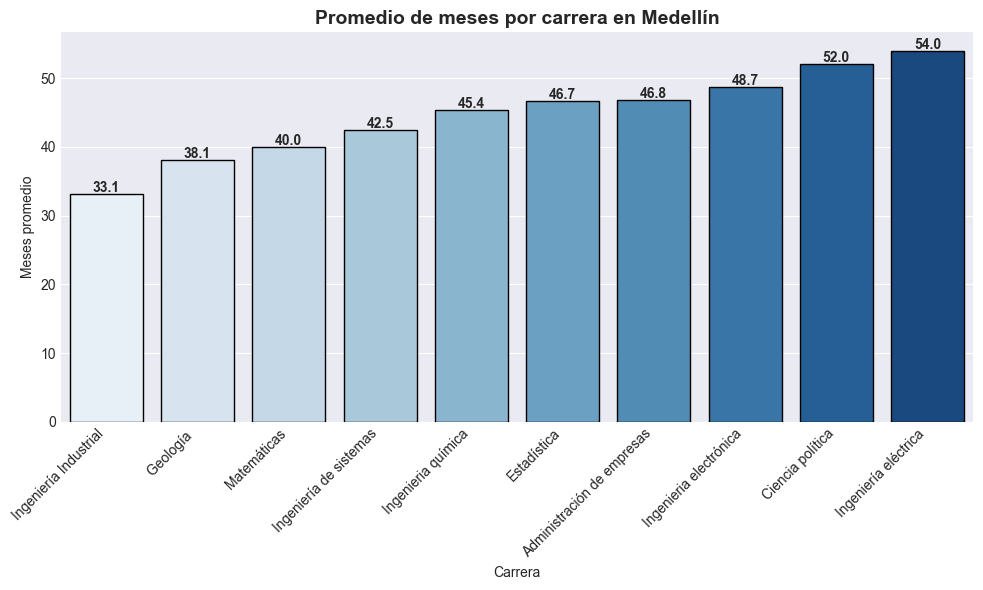

C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\3095907730.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


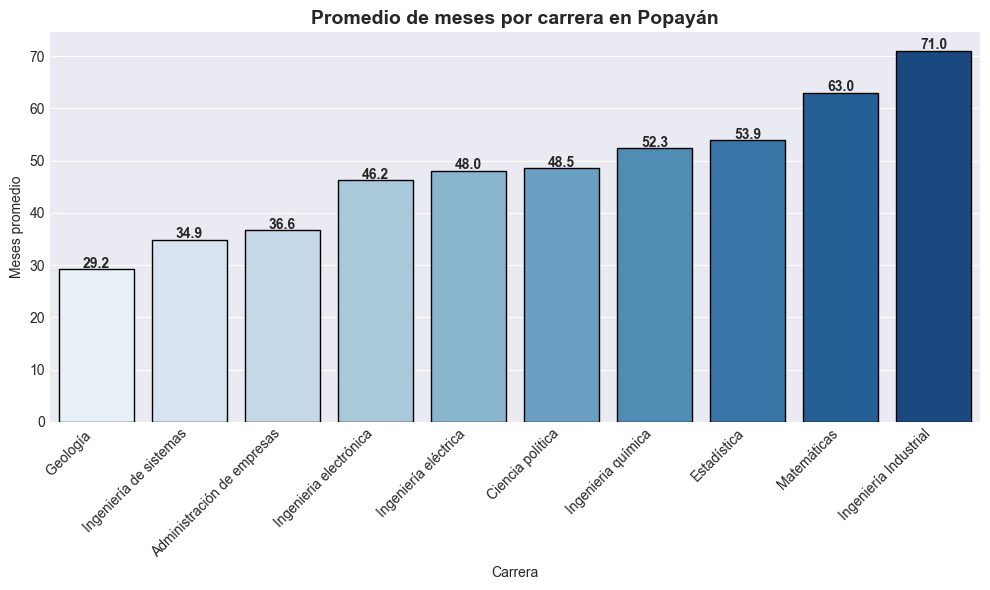

C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\3095907730.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


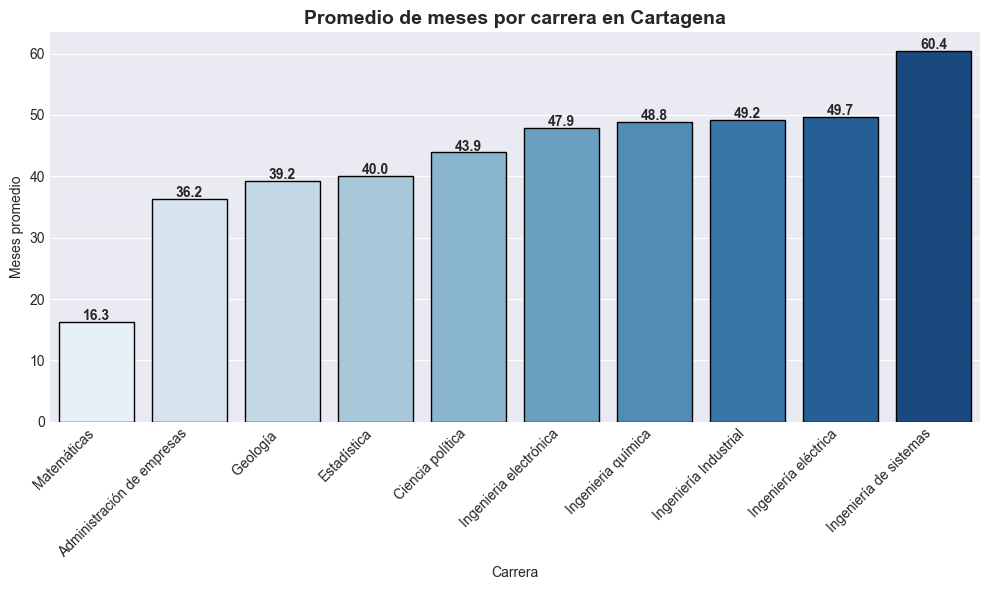

C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\3095907730.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


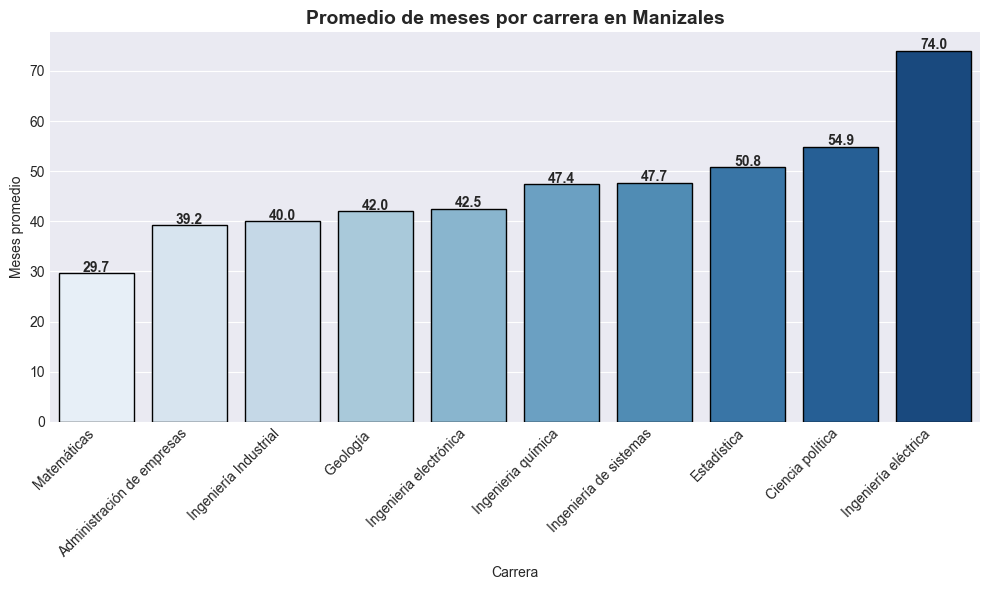

C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\3095907730.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


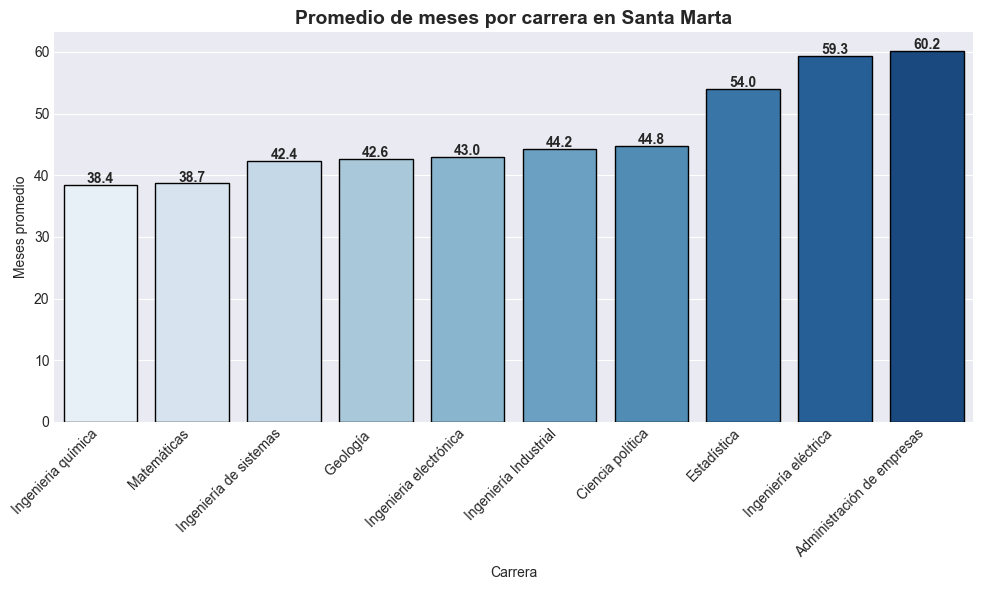

C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\3095907730.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


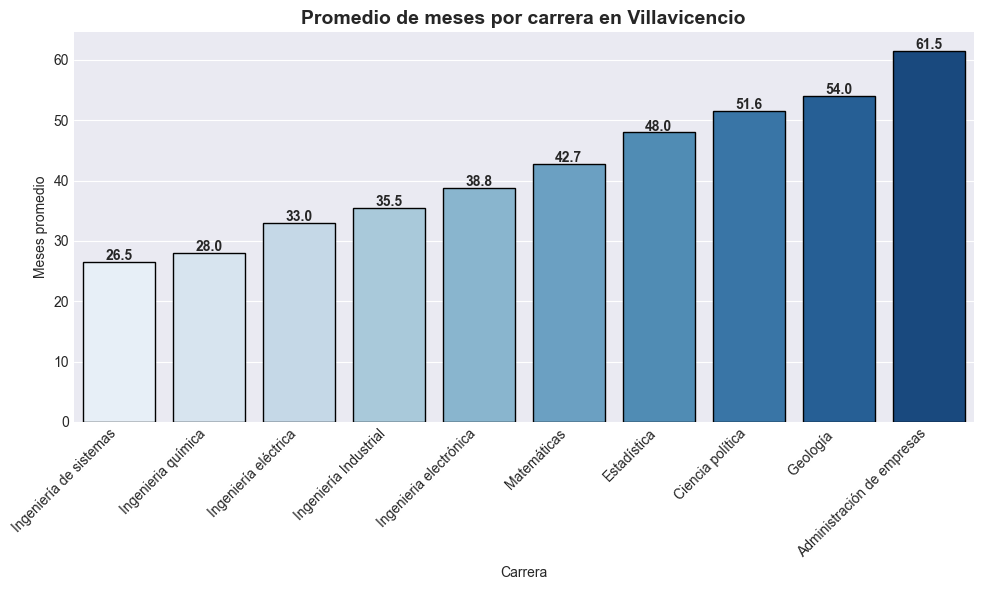

C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\3095907730.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


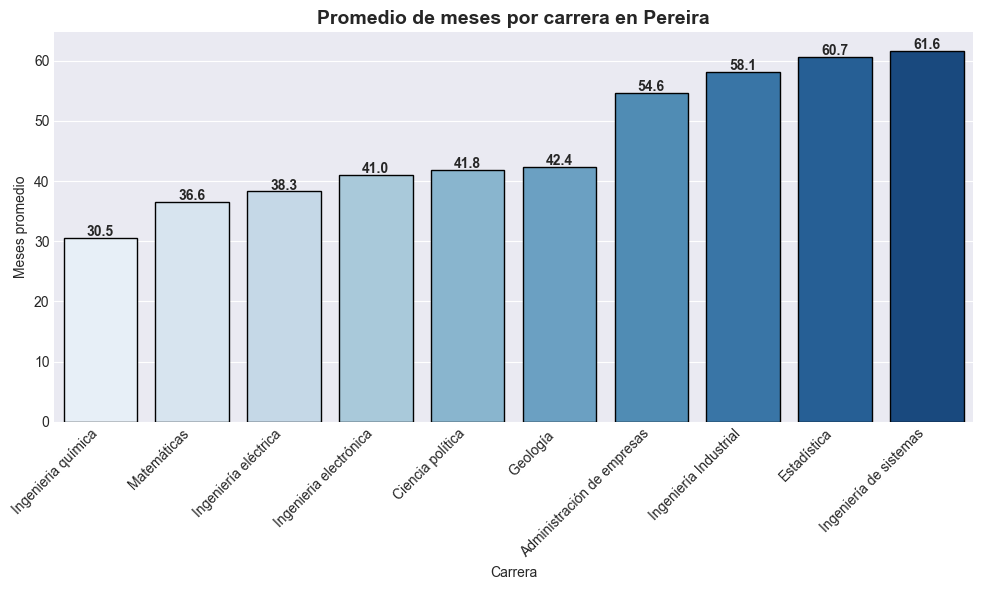

C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\3095907730.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


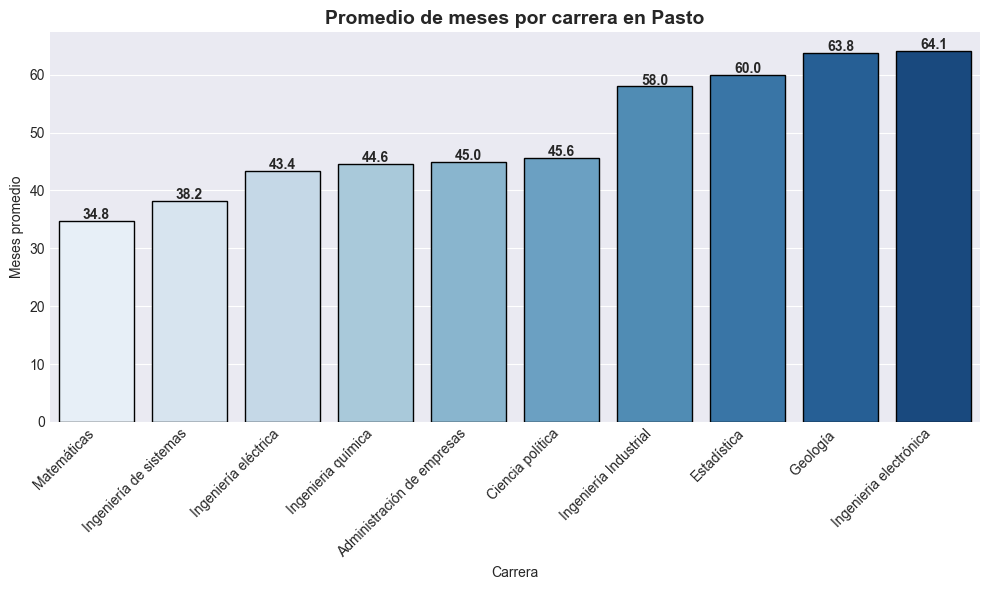

C:\Users\jeroh\AppData\Local\Temp\ipykernel_16504\3095907730.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


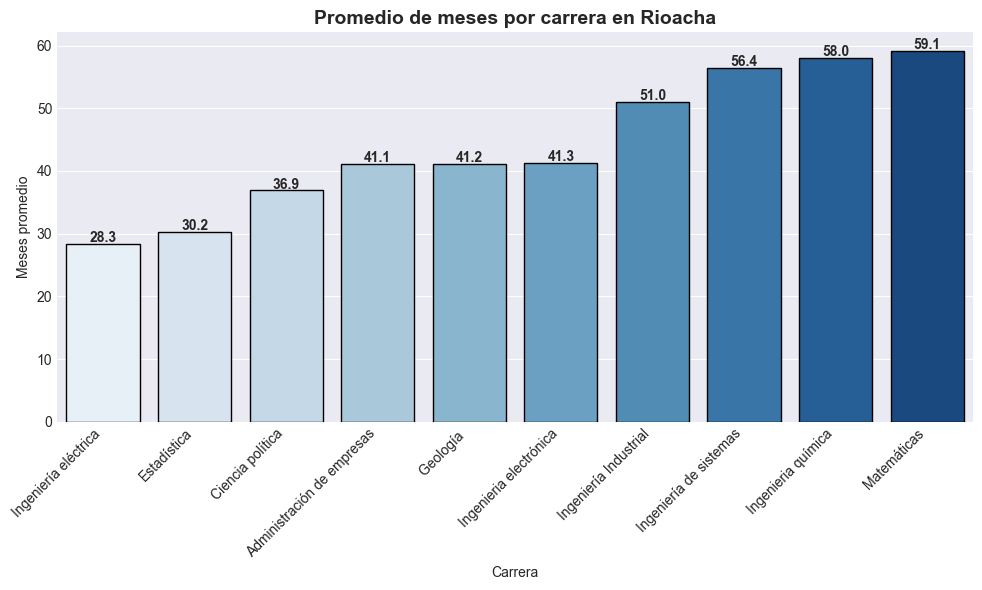

In [ ]:

promedio_carrera = df_Estudiante.groupby('CARRERA')['MESES_TRANSCURRIDOS'].mean().reset_index()
promedio_carrera = promedio_carrera.sort_values('MESES_TRANSCURRIDOS', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=promedio_carrera,
    x='CARRERA',
    y='MESES_TRANSCURRIDOS',
    palette='Blues_r',
    edgecolor='black'
)
plt.title("Promedio de meses transcurridos por carrera (General)", fontsize=14, fontweight='bold')
plt.xlabel("Carrera")
plt.ylabel("Meses promedio")
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(promedio_carrera['MESES_TRANSCURRIDOS']):
    plt.text(i, v + 0.3, f"{v:.1f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

ciudades = df_Estudiante['NOMBRECIUDAD'].unique()

for ciudad in ciudades:
    datos_ciudad = df_Estudiante[df_Estudiante['NOMBRECIUDAD'] == ciudad]
    promedio_ciudad = datos_ciudad.groupby('CARRERA')['MESES_TRANSCURRIDOS'].mean().reset_index()
    promedio_ciudad = promedio_ciudad.sort_values('MESES_TRANSCURRIDOS', ascending=True)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=promedio_ciudad,
        x='CARRERA',
        y='MESES_TRANSCURRIDOS',
        palette='Blues',
        edgecolor='black'
    )
    plt.title(f"Promedio de meses por carrera en {ciudad}", fontsize=14, fontweight='bold')
    plt.xlabel("Carrera")
    plt.ylabel("Meses promedio")
    plt.xticks(rotation=45, ha='right')

    for i, v in enumerate(promedio_ciudad['MESES_TRANSCURRIDOS']):
        plt.text(i, v + 0.3, f"{v:.1f}", ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

In [26]:
# 1. Crear una lista con los valores que queremos buscar
valores_incompletos = ['TELEFONO', 'CORREO', 'FECHAINGRESO']

# 2. Usar .isin() para filtrar el DataFrame.
# Esto selecciona todas las filas donde 'CONTACTO_INCOMPLETO' es uno de los valores de la lista.
estudiantes_con_datos_faltantes = df_Estudiante[df_Estudiante['CONTACTO_INCOMPLETO'].isin(valores_incompletos)]

# 3. Imprimir el resultado para ver a todos los estudiantes identificados
print("Estudiantes con teléfono, correo o fecha de ingreso faltante:")
print(estudiantes_con_datos_faltantes[['ID','NOMBREAPELLIDO', 'CONTACTO_INCOMPLETO']])


Estudiantes con teléfono, correo o fecha de ingreso faltante:
      ID NOMBREAPELLIDO CONTACTO_INCOMPLETO
5      6      ODYULIANA              CORREO
7      8        EDWSAIN              CORREO
51    52        DISNERY            TELEFONO
155  156        LAURELY        FECHAINGRESO
228  229         NEIYER              CORREO
232  233        ERCIRIA            TELEFONO
278  279         DREICY            TELEFONO
309  310        SIBELIA        FECHAINGRESO
365  366        MARIAIS            TELEFONO
409  410        ANDIERI            TELEFONO
521  522         HAYDUK        FECHAINGRESO
526  527          LAYNA            TELEFONO
590  591         ALENAY            TELEFONO
632  633           GIME            TELEFONO
747  748       KEOPASTY              CORREO
750  751         ALGARO        FECHAINGRESO
774  775          YABAN            TELEFONO
807  808         OSULAY            TELEFONO
868  869           JHPN            TELEFONO
964  965        SORAMAY        FECHAINGRESO
980  981      